In [2]:
# download and install system requiriements 
# !pip install -r ../requirements.txt

## 01 - Download and list the root files (signal and background) from Open Data Portal

In [1]:
import subprocess 
import numpy as np

open_data_file_id = "63168"
command = ["cernopendata-client", "get-file-locations", "--recid", open_data_file_id, "--protocol", "xrootd"]
result = subprocess.run(command, capture_output=True, text=True)
filenames = result.stdout.splitlines()
filenames_bkg = np.array(filenames)


open_data_file_id = "33703"
command = ["cernopendata-client", "get-file-locations", "--recid", open_data_file_id, "--protocol", "xrootd"]
result = subprocess.run(command, capture_output=True, text=True)
filenames = result.stdout.splitlines()
filenames_sig = np.array(filenames)
 
# Print the NumPy array
print(filenames_bkg)
print(filenames_sig)

['root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/130000/1C569D85-60AE-7D43-B42B-6D6FD1D66CC7.root'
 'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/130000/2EDCC683-1B4B-614B-BEB7-D80BBC20AD8E.root'
 'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/270000/19E8D842-3175-1449-AF6C-FD9C69D12724.root'
 'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/270000/3957434B-7E09-3B4C-8329-FD44D82C7DB7.root'
 'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asy

In [2]:
import subprocess 
import numpy as np
import uproot
import matplotlib.pylab as plt
import awkward as ak
import numpy as np
from glob import glob

treename = "Events"
branch_dict = {
                "Muon": ["pt", "eta", "phi"],
                "Electron": ["pt", "eta", "phi"],
                "FatJet": ["pt", "eta", "phi"],
                # "MET": ["pt", "phi"]
            }

# make list of branches to read from the dictionary above
branch_names = []
for obj, var in branch_dict.items(): 
    branch_names += [obj + "_" + v for v in var]

infiles_sig = filenames_sig[:] # Lets use all the signal files

## aggregate all data files into one single python oobject
data_sig = uproot.concatenate({fname:"Events" for fname in infiles_sig}, 
                              branch_names, 
                              how = "zip",
                              library = "ak")


# # Here is an example of how you can open a single file rith awkward and regex for the branch expression :

# file_bkg = uproot.open(infiles_bkg[0])
# data_bkg = file_bkg["Events"].arrays(
#     filter_name = "/(Muon|Electron|FatJet|MET)_(pt|eta|phi|sumEt)/", 
#     how = "zip"
# )

OSError: File did not vector_read properly: [ERROR] Operation expired

In [4]:
{fname:"Events" for fname in infiles_bkg}

{'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/130000/1C569D85-60AE-7D43-B42B-6D6FD1D66CC7.root': 'Events',
 'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/130000/2EDCC683-1B4B-614B-BEB7-D80BBC20AD8E.root': 'Events',
 'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/270000/19E8D842-3175-1449-AF6C-FD9C69D12724.root': 'Events',
 'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/270000/3957434B-7E09-3B4C-8329-FD44D82C7DB7.root': 'Events',
 'root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2

In [5]:

# infiles_bkg = ["root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/130000/2EDCC683-1B4B-614B-BEB7-D80BBC20AD8E.root","root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/270000/19E8D842-3175-1449-AF6C-FD9C69D12724.root","root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/270000/3957434B-7E09-3B4C-8329-FD44D82C7DB7.root","root://eospublic.cern.ch//eos/opendata/cms/mc/RunIISummer20UL16NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/270000/397D1673-167A-CF46-9E79-D7069D9AC359.root"]
infiles_bkg = filenames_bkg[0:4] #Let's use only 4 of the background files, one of the first files seems to not be accessible with xrootd so I take entry 4-8

data_bkg = uproot.concatenate({fname:"Events" for fname in infiles_bkg}, 
                            branch_names, 
                            how = "zip",
                            library = "ak")


Now we have each object grouped in a respective field, and the variables are accesible at the next level (this is a result of using how="zip" when loading)

In [6]:
print(f"Training on N signal samples: {len(data_sig)}")
print(f"Training on N backgr samples: {len(data_bkg)}")

Training on N signal samples: 137000
Training on N backgr samples: 2174000


### Saves the data for later use

In [7]:
signal_list = data_sig.to_list()
background_list = data_bkg.to_list()

import pickle
# Salvar o array com pickle
with open("awk_signal_list.pkl", "wb") as f:
    pickle.dump(signal_list, f)

with open("awk_background_list.pkl", "wb") as f:
    pickle.dump(background_list, f)

### (re-start here) Loads the pre-saved data

In [13]:
import pickle
import subprocess 
import numpy as np
import uproot
import matplotlib.pylab as plt
import awkward as ak
import numpy as np
from glob import glob

DATA_PATH = "../data/"

# Salvar o array com pickle
with open(DATA_PATH + "awk_signal_list.pkl", "rb") as f:
    signal_list = pickle.load(f)

with open(DATA_PATH + "awk_background_list.pkl", "rb") as f:
    background_list = pickle.load(f)


data_sig = ak.from_regular(signal_list)
data_bkg = ak.from_regular(background_list)

In [ ]:
import mplhep
mplhep.style.use('CMS')

for obj in [ 'Muon', 'Electron', 'FatJet']:
    plt.figure(figsize = (8,4))

    for label, data in zip(["bkg","sig"], [data_bkg, data_sig]):
        num = ak.num(data[obj]) ## convert akward object to numpy array

        # plot the histogram into "CMS" format
        plt.hist(num, label = label, bins = range(13), density = True, 
                 #log = True, 
                 histtype = "step")
        
    plt.xlabel(f"N of {obj}")
    plt.legend()
    plt.grid()

In [ ]:
for obj in [ 'Electron', 'FatJet', 'Muon']:
    plt.figure(figsize = (8,4))

    for label, data in zip(["bkg","sig"], [data_bkg, data_sig]):
        # notice the [:,:1] below -> we slice the array and select no more than the first entry per event
        # ak.ravel makes the array flat such that we can fill a histogram
        plt.hist(ak.ravel(data[obj].pt[:,:1]), label = label, bins = np.linspace(1, 2000, 101), density = True, 
                 log = True, 
                 histtype = "step")
        
    plt.xlabel(f"{obj} pt")
    plt.legend()
    plt.grid()

# 02 - Convert data to regular array for ML usage

Now we need to convert this to something regular that an ML algorithm can use! We will use dedicated functions to ease this conversion from jagged to regular format

In [8]:
def getPadNParr(events, obj, n_pad, fields, cuts = None, name = None, pad_val = 0):
    '''
    This function filter objects and pads them to a certain length with a given value
    events: events object, usually an 'akward' object
    obj: key of the object we are interested in - MET, Electron, Muon, FatJet, etc.
    n_pad: numbers of the same object in the same event, for the case where there are 2 muons, etc
    fields: list of physical proprieties of the object we want: ["pt", "eta", "phi", ...]
    cuts: cuts to be made to the arrays
    name: same as the key for the object -> MET, Electron, Muon, FatJet, etc.
    pad_val: value to be inserted in the None values of the ak.array, defaults to 0
    '''
    
    objects = events[obj]
    
    if not name: name = obj
    
    pad_arrs = []
    var_names = []
        
    # padding with nones
    pad_arr = ak.pad_none(objects, n_pad, clip=True)
    
    # combining to numpy
    for i in range(n_pad):

        for var in fields:
            pad_arrs += [ak.to_numpy( ak.fill_none(pad_arr[var][:,i], pad_val) )]
            var_names.append( "{}_{}_{}".format(name, i, var) )
            
    return np.stack(pad_arrs), var_names

def formatData(data, objects, verbosity = 0):
    '''
    This function concatenates the padded arrays for different objects.
    It is controlled via a dictionary as defined above

    data: events object, agreggated for all datasets, usually an 'akward' object
    objects: a list of dicts formated as  
        objects = [{"name" : "MET", "key" : "MET", "fields" : ["pt", "phi"], "n_obj" : 1 }, 
                    ...,
                    ]

    verbosity: controls the verbosity of the function, 0 for false, 1 for true

    '''
    
    # this will be filled by all required objects
    dataList = [] 
    varList = []
    
    # loop over the dicts on the object array
    for obj in objects: 
        print(obj)
        dat, names = getPadNParr(data, obj["key"], obj["n_obj"], obj["fields"], obj["cuts"] if "cuts" in obj else None, obj["name"] )
        dataList.append(dat)
        varList += names
        
    if verbosity > 0:
        print("The input variables are the following:")
        print(varList)
                
    # combining and returning (and transforming back so events are along the first axis...)
    return dataList, np.concatenate(dataList, axis = 0).T, varList

In [26]:
objects = [
    # {"name" : "MET", "key" : "MET", "fields" : ["pt", "phi"], "n_obj" : 1 },
    {"name" : "FatJet", "key" : "FatJet", "fields" : ["pt", "eta", "phi"], "n_obj" : 6},
    {"name" : "Electron", "key" : "Electron", "fields" : ["pt", "eta", "phi"], "n_obj" : 4},
    {"name" : "Muon", "key" : "Muon", "fields" : ["pt", "eta", "phi"], "n_obj" : 4}
]
    
dataList_, x_sig, var_names = formatData(data_sig, objects, verbosity = 99) 
dataList, x_bkg, var_names = formatData(data_bkg, objects, verbosity = 0) 

{'name': 'FatJet', 'key': 'FatJet', 'fields': ['pt', 'eta', 'phi'], 'n_obj': 6}
{'name': 'Electron', 'key': 'Electron', 'fields': ['pt', 'eta', 'phi'], 'n_obj': 4}
{'name': 'Muon', 'key': 'Muon', 'fields': ['pt', 'eta', 'phi'], 'n_obj': 4}
The input variables are the following:
['FatJet_0_pt', 'FatJet_0_eta', 'FatJet_0_phi', 'FatJet_1_pt', 'FatJet_1_eta', 'FatJet_1_phi', 'FatJet_2_pt', 'FatJet_2_eta', 'FatJet_2_phi', 'FatJet_3_pt', 'FatJet_3_eta', 'FatJet_3_phi', 'FatJet_4_pt', 'FatJet_4_eta', 'FatJet_4_phi', 'FatJet_5_pt', 'FatJet_5_eta', 'FatJet_5_phi', 'Electron_0_pt', 'Electron_0_eta', 'Electron_0_phi', 'Electron_1_pt', 'Electron_1_eta', 'Electron_1_phi', 'Electron_2_pt', 'Electron_2_eta', 'Electron_2_phi', 'Electron_3_pt', 'Electron_3_eta', 'Electron_3_phi', 'Muon_0_pt', 'Muon_0_eta', 'Muon_0_phi', 'Muon_1_pt', 'Muon_1_eta', 'Muon_1_phi', 'Muon_2_pt', 'Muon_2_eta', 'Muon_2_phi', 'Muon_3_pt', 'Muon_3_eta', 'Muon_3_phi']
{'name': 'FatJet', 'key': 'FatJet', 'fields': ['pt', 'eta', 'p

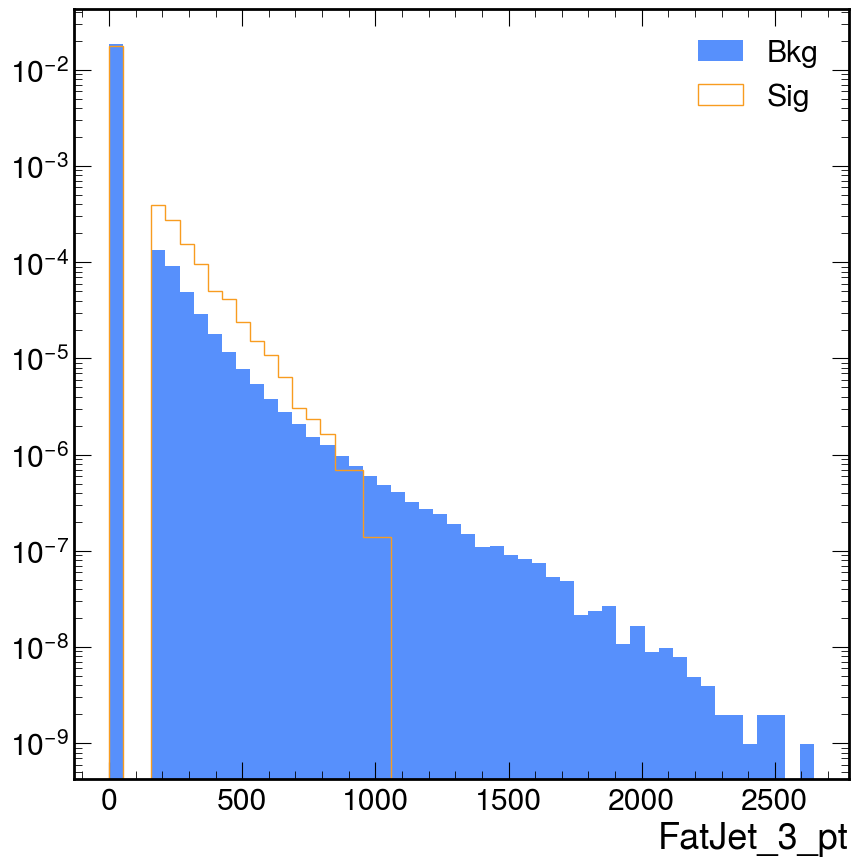

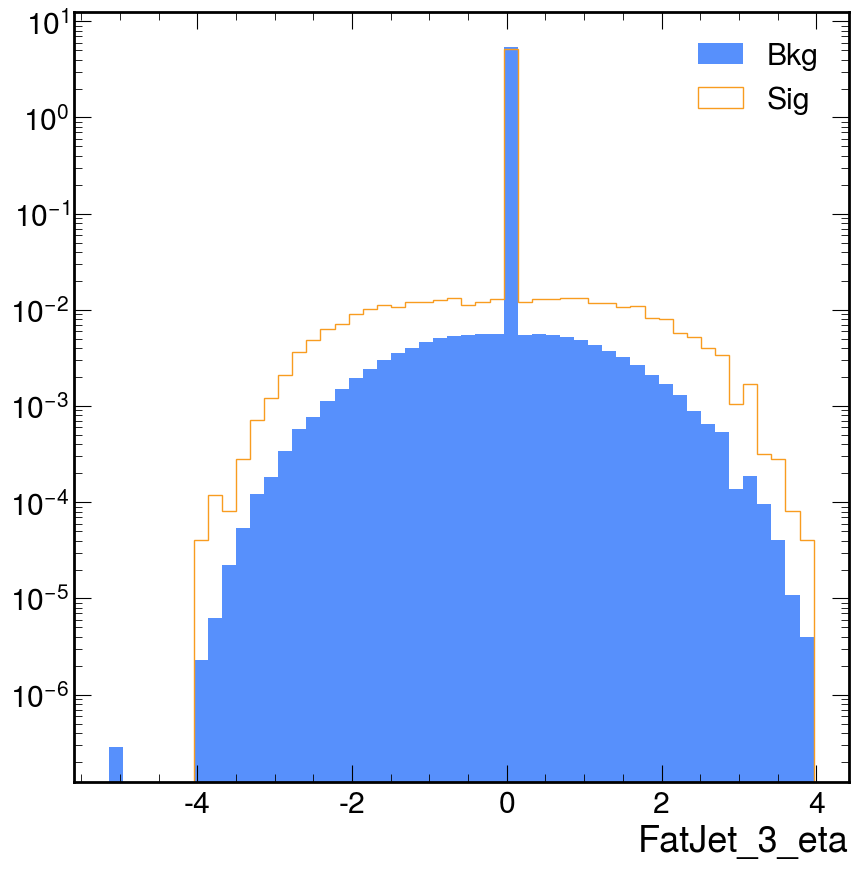

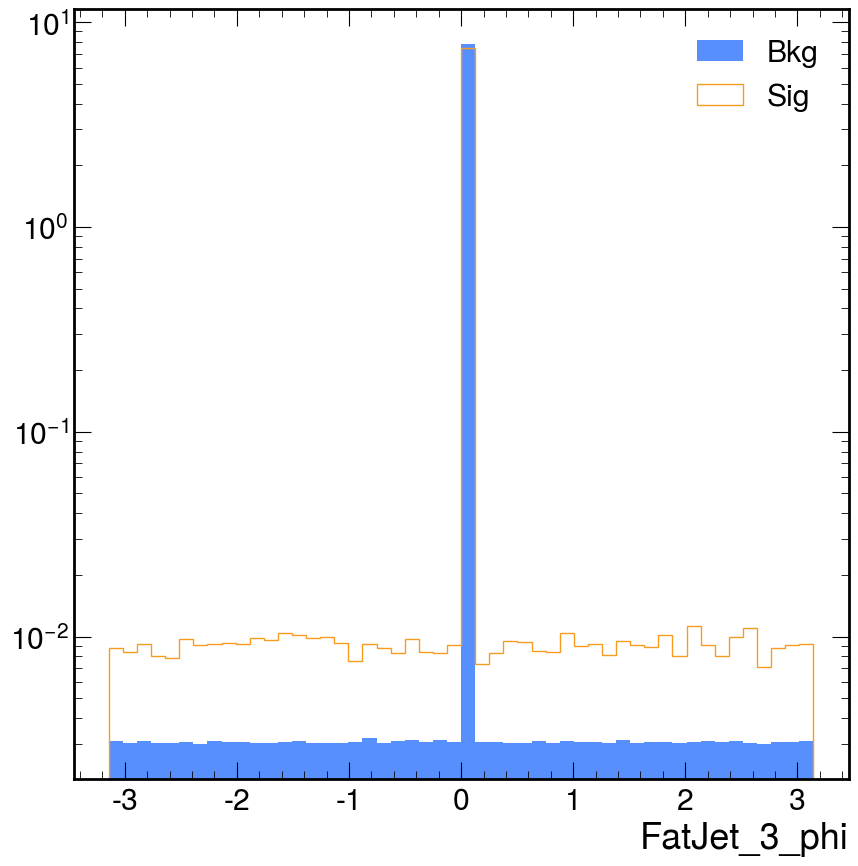

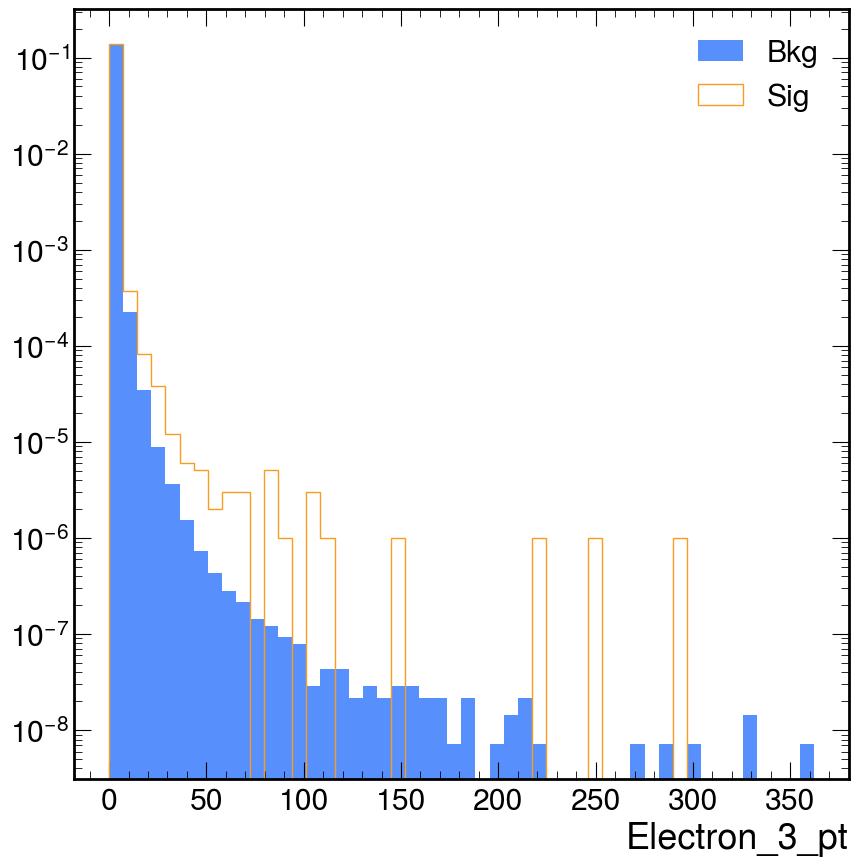

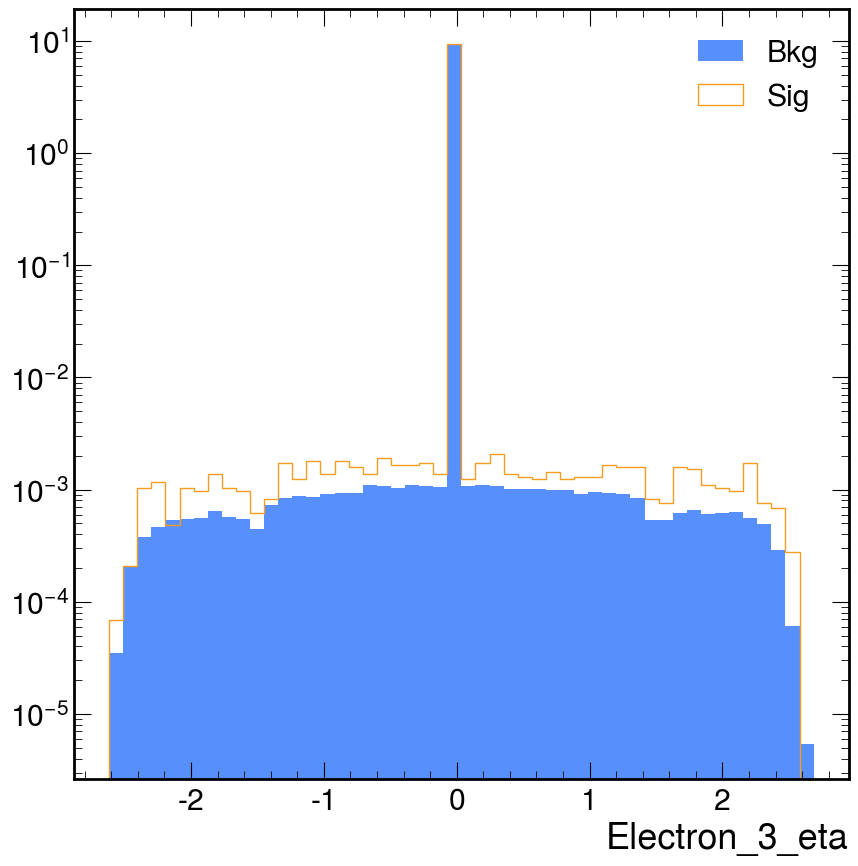

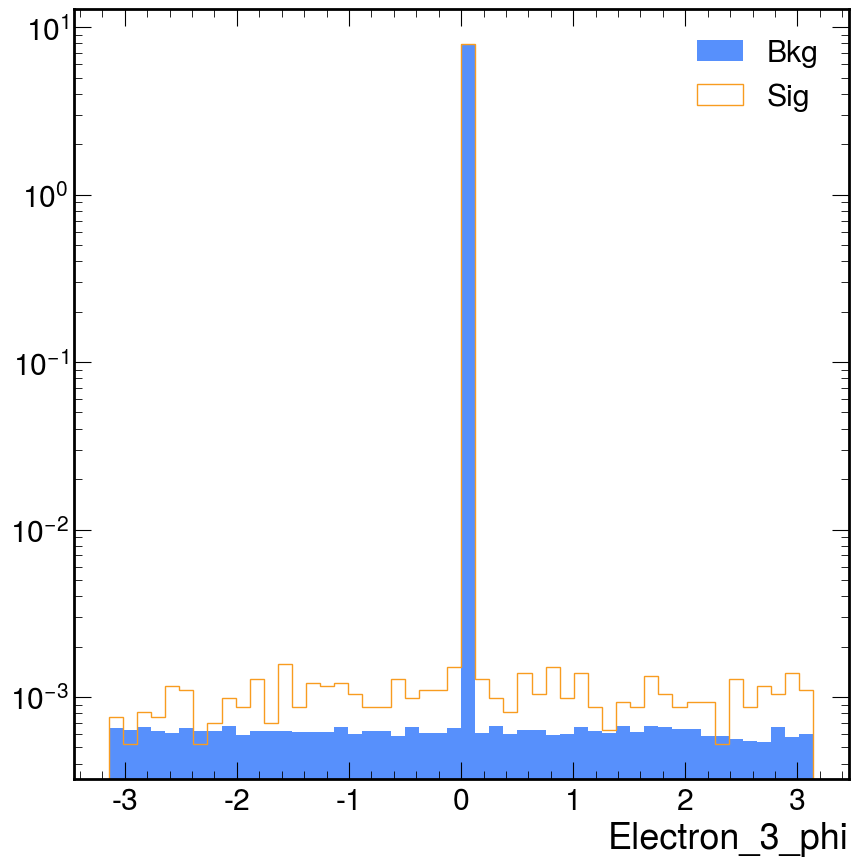

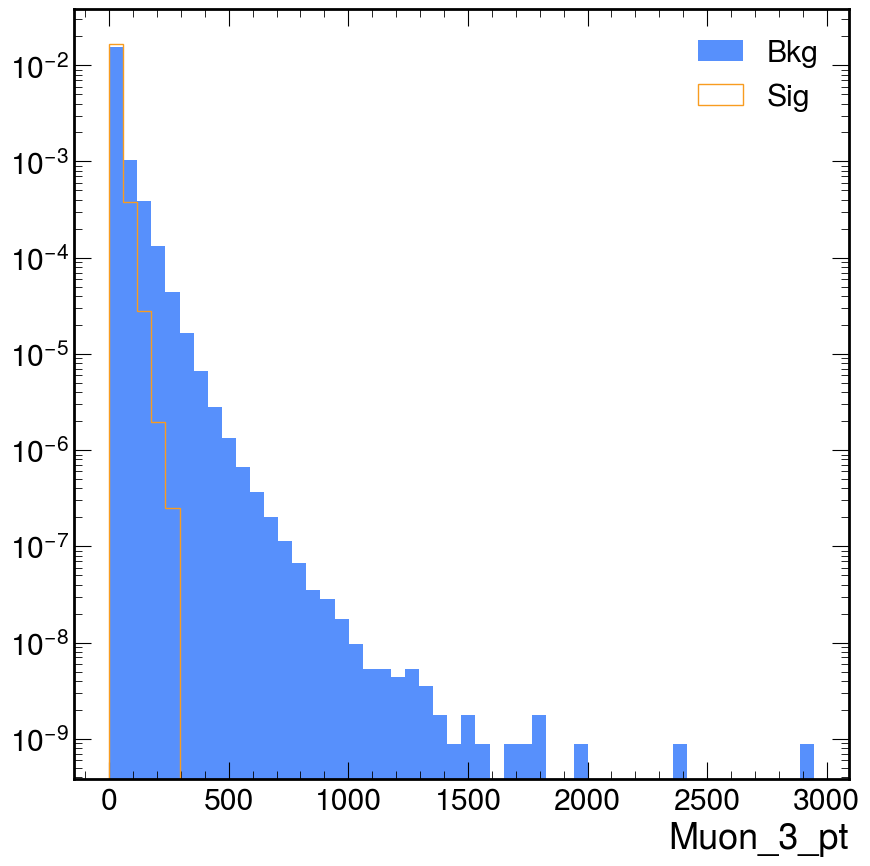

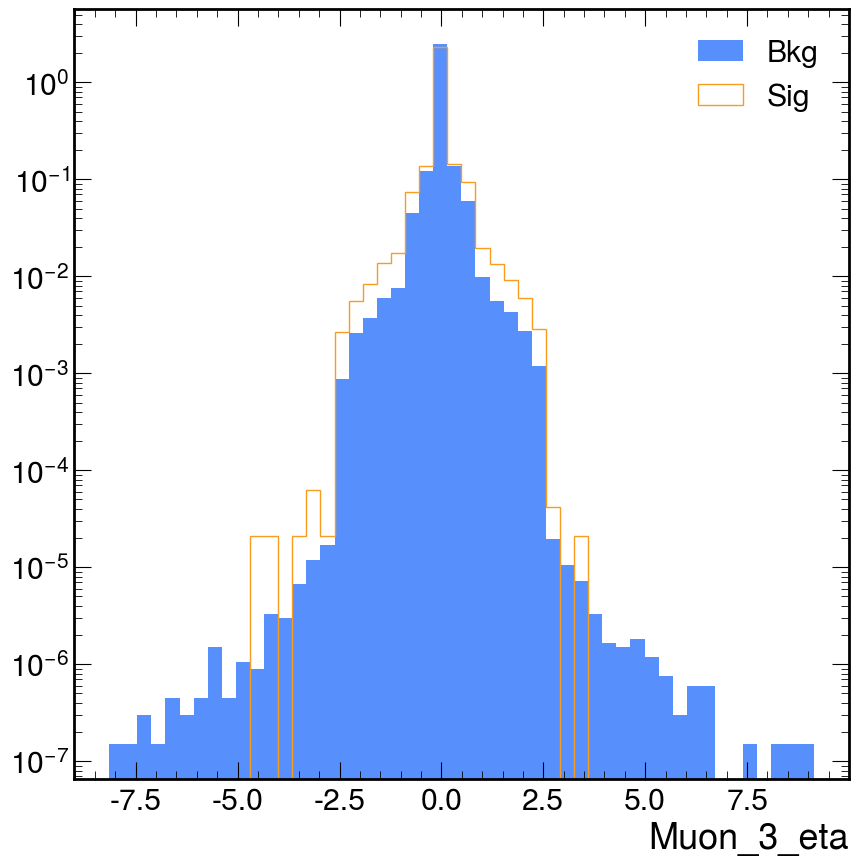

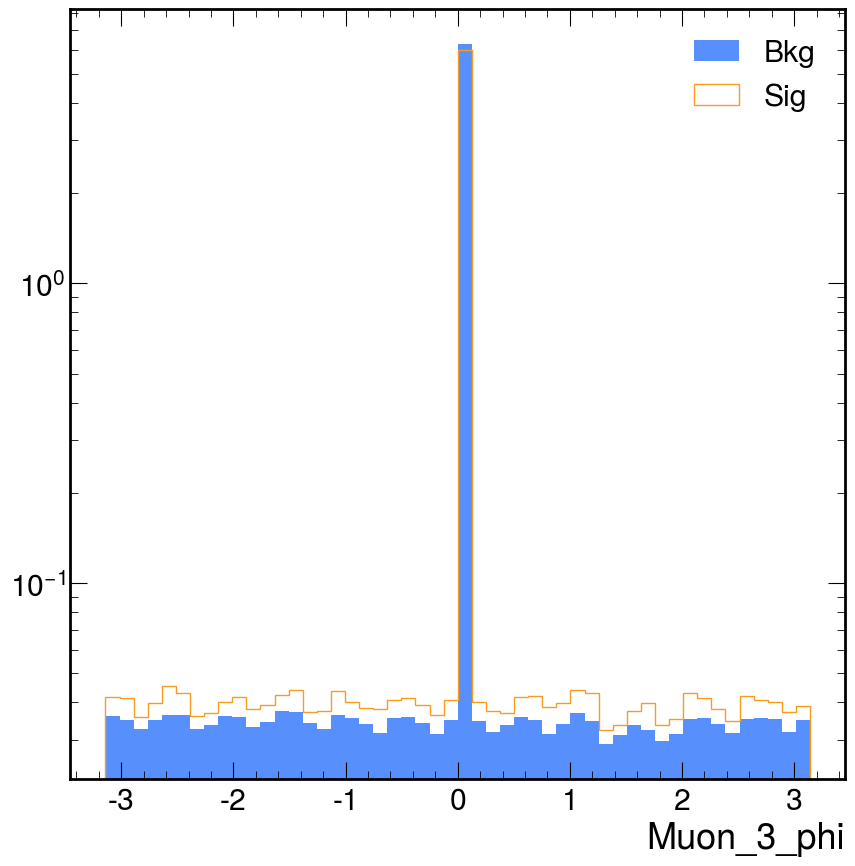

In [27]:
# Let's look at some of the inputs and see whether they make sense!

for i,name in enumerate(var_names[:100]):
    if "_3_" not in name: continue
        
    plt.figure()
    
    _ = plt.hist(x_bkg[:,i], bins = 50, log = True, density = True, label = "Bkg")
    _ = plt.hist(x_sig[:,i], bins = _[1], histtype = "step", density = True, label = "Sig")
    
    plt.xlabel(name)
    plt.legend()
#     break

You can see now that for the non-sum objects we have peaks at 0 as this was the pad_val padding value for filling empty variables. 


# Final preprocessing


Let's prepare the data!
Having very different numerical ranges for the input features, as in this case where $p_T$, $\eta$ and $\phi$ have a very diffent mean, makes it difficult for the network to converge. We will therefore standardize the $p_T$.  Also, when there is no lepton present in the event, the values will be zero padded. That means there is an unnatural number of zero entries in the $p_T$. For a real use case, the loss should be rewritten as to not take zero entries into account. Ideally we would also deal with the periodicity of phi etc. Details on the best procedure for preprccesing can be found in [this paper](https://arxiv.org/abs/2108.03986). In the interest of time, we'll only do the $p_T$ scaling.

In addition, we split the training data into train/test sets and save them: 

In [28]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
_ = scaler.fit(x_bkg)
x_bkg_scaled = scaler.transform(x_bkg)
x_sig_scaled = scaler.transform(x_sig)
    
        
# define training, test and validation datasets
X_train, X_test = train_test_split(x_bkg_scaled, test_size=0.2, shuffle=True)

print("Training data shape = ",X_train.shape)    
with h5py.File('bkg_dataset.h5', 'w') as h5f:
    h5f.create_dataset('X_train', data = X_train)
    h5f.create_dataset('X_test', data = X_test)
    
with h5py.File('signal_dataset.h5', 'w') as h5f2:
    h5f2.create_dataset('Data', data = x_sig_scaled)        


Training data shape =  (15423200, 42)


You  now have two new files in your reposity, `bkg_dataset.h5` and `signal_dataset.h5` which contains your train/test/val data to train the autoencoder, as well as a test data to check your performance on a New Physics signal